In [1]:
import pandas as pd

# How to work with dates and times in pandas?

In [2]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('data/ufo.csv')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [3]:
# 'Time' is currently stored as a string
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [13]:
# hour could be accessed using string slicing
ufo.Time.str.slice(-5, -3).astype(int)

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int32

In [14]:
# convert 'Time' to datetime format
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [15]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [16]:
# convenient Series attributes are now available
ufo.Time.dt.hour

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [17]:
ufo.Time.dt.dayofyear

0        152
1        181
2         46
3        152
4        108
        ... 
18236    366
18237    366
18238    366
18239    366
18240    366
Name: Time, Length: 18241, dtype: int64

In [18]:
# convert a single string to datetime format (outputs a timestamp object)
ts = pd.to_datetime('1/1/1999')
ts

Timestamp('1999-01-01 00:00:00')

In [19]:
ufo.shape

(18241, 5)

In [25]:
# compare a datetime Series with a timestamp
ufo.loc[ufo.Time >= ts, :]

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [26]:
# perform mathematical operations with timestamps (outputs a timedelta object)
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [27]:
# timedelta objects also have attributes you can access
(ufo.Time.max() - ufo.Time.min()).days

25781

In [28]:
# allow plots to appear in the notebook
%matplotlib inline

In [29]:
# count the number of UFO reports per year
ufo['Year'] = ufo.Time.dt.year


In [30]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [31]:
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
        ... 
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
Name: Year, Length: 68, dtype: int64

<AxesSubplot:>

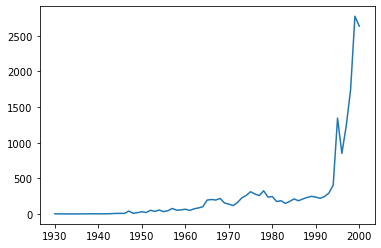

In [32]:
# plot the number of UFO reports per year (line plot is the default)
ufo.Year.value_counts().sort_index().plot()

# How to find and remove duplicate rows?

In [33]:
# read a dataset of movie reviewers into a DataFrame
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('data/u.user', sep='|', header=None, names=user_cols, index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [34]:
users.shape

(943, 4)

In [35]:
# detect duplicate zip codes: True if an item is identical to a previous item
users.zip_code.duplicated()

user_id
1      False
2      False
3      False
4      False
5      False
       ...  
939    False
940     True
941    False
942    False
943    False
Name: zip_code, Length: 943, dtype: bool

In [36]:
# count the duplicate items (True becomes 1, False becomes 0)
users.zip_code.duplicated().sum()

148

In [37]:
# detect duplicate DataFrame rows: True if an entire row is identical to a previous row
users.duplicated().tail()

user_id
939    False
940    False
941    False
942    False
943    False
dtype: bool

In [38]:
# count the duplicate rows
users.duplicated().sum()

7

Logic for [**`duplicated`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html):

- **`keep='first'`** (default): Mark duplicates as True except for the first occurrence.
- **`keep='last'`**: Mark duplicates as True except for the last occurrence.
- **`keep=False`**: Mark all duplicates as True.

In [39]:
# examine the duplicate rows (ignoring the first occurrence)
users.loc[users.duplicated(keep='first'), :]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [40]:
# examine the duplicate rows (ignoring the last occurrence)
users.loc[users.duplicated(keep='last'), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630


In [41]:
# examine the duplicate rows (including all duplicates)
users.loc[users.duplicated(keep=False), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


In [42]:
# drop the duplicate rows (inplace=False by default)
users.drop_duplicates(keep='first')

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [43]:
users.drop_duplicates(keep='first').shape

(936, 4)

In [44]:
users.shape

(943, 4)

In [45]:
users.drop_duplicates(keep='last').shape

(936, 4)

In [46]:
users.drop_duplicates(keep=False).shape

(929, 4)

In [47]:
# only consider a subset of columns when identifying duplicates
users.duplicated(subset=['age', 'zip_code']).tail()

user_id
939    False
940    False
941    False
942    False
943    False
dtype: bool

In [48]:
users.drop_duplicates(subset=['age', 'zip_code'],inplace=True).shape

AttributeError: 'NoneType' object has no attribute 'shape'

# Creating DataFrame from another object

In [49]:
# create a DataFrame from a dictionary (keys become column names, values become data)
pd.DataFrame({'id':[100, 101, 102], 'color':['red', 'blue', 'red']})

,id,color
0,100,red
1,101,blue
2,102,red


In [50]:
# optionally specify the order of columns and define the index
df = pd.DataFrame({'id':[100, 101, 102], 'color':['red', 'blue', 'red']}, 
                  columns=['id', 'color'], index=['a', 'b', 'c'])
df

,id,color
a,100,red
b,101,blue
c,102,red


In [ ]:
# create a DataFrame from a list of lists (each inner list becomes a row)
pd.DataFrame([[100, 'red'], [101, 'blue'], [102, 'red']], columns=['id', 'color'])

In [ ]:
# create a new Series using the Series constructor
s = pd.Series(['round', 'square'], index=['c', 'b'], name='shape')
s

In [ ]:
# concatenate the DataFrame and the Series (use axis=1 to concatenate columns)
pd.concat([df, s], axis=1)

**Notes:**

- The Series name became the column name in the DataFrame.
- The Series data was aligned to the DataFrame by its index.
- The 'shape' for row 'a' was marked as a missing value (NaN) because that index was not present in the Series.

# How to apply a function to a Series or DataFrame?

In [52]:
train = pd.read_csv('data/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Map the existing values of a Series to a different set of values

**Method:`map`**

In [53]:
train.Sex.map({'female':0, 'male':1})

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [54]:
# map 'female' to 0 and 'male' to 1
train['Sex_num'] = train.Sex.map({'female':0, 'male':1})


In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [56]:
train.loc[0:4, ['Sex', 'Sex_num']]

,Sex,Sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


## Apply a function to each element in a Series

**Method:** **`apply`**<br>

**Note:** **`map`** can be substituted for **`apply`** in many cases, but **`apply`** is more flexible and thus is recommended

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [58]:
# calculate the length of each string in the 'Name' Series
train['Name_length'] = train.Name.apply(len)

In [59]:
train.loc[0:4, ['Name', 'Name_length']]

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [60]:
# round up each element in the 'Fare' Series to the next integer
import numpy as np
train['Fare_ceil'] = train.Fare.apply(np.ceil)
train.loc[0:4, ['Fare', 'Fare_ceil']]

,Fare,Fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0
3,53.1000,54.0
4,8.0500,9.0


In [61]:
# we want to extract the last name of each person
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [62]:
# use a string method to split the 'Name' Series at commas (returns a Series of lists)
train.Name.str.split(',')

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [ ]:
# define a function that returns an element from a list based on position
def get_element(my_list, position):
    return my_list[position]

In [ ]:
# apply the 'get_element' function and pass 'position' as a keyword argument
train.Name.str.split(',').apply(get_element, position=0)

In [ ]:
# alternatively, use a lambda function
train.Name.str.split(',').apply(lambda x: x[0])

## Apply a function along either axis of a DataFrame

In [64]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [65]:
# select a subset of the DataFrame to work with
drinks.loc[:, 'beer_servings':'wine_servings']

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45
...,...,...,...
188,333,100,3
189,111,2,1
190,6,0,0
191,32,19,4


In [66]:
# apply the 'max' function along axis 0 to calculate the maximum value in each column
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [67]:
# apply the 'max' function along axis 1 to calculate the maximum value in each row
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1)

0        0
1      132
2       25
3      312
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Length: 193, dtype: int64

In [68]:
drinks.loc[:, 'beer_servings':'wine_servings']

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45
...,...,...,...
188,333,100,3
189,111,2,1
190,6,0,0
191,32,19,4


In [69]:
# convert every DataFrame element into a float
drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0
...,...,...,...
188,333.0,100.0,3.0
189,111.0,2.0,1.0
190,6.0,0.0,0.0
191,32.0,19.0,4.0
